In [1]:
import pandas as pd
import re, string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


### load and analyzing Dataset

In [2]:
df = pd.read_csv("../data/bbc-news-data.csv", sep="\t")
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [18]:
print(df.describe())
print("_" * 90)
print(df.columns)

       category filename                             title  \
count      2225     2225                              2225   
unique        5      511                              2096   
top       sport  001.txt  Microsoft seeking spyware trojan   
freq        511        5                                 2   

                                                  content  
count                                                2225  
unique                                               2092  
top      Microsoft has warned PC users to update their...  
freq                                                    2  
__________________________________________________________________________________________
Index(['category', 'filename', 'title', 'content'], dtype='object')


In [ ]:
# cleaning the text 
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text.strip()

df['content'] = df['content'].apply(clean_text)

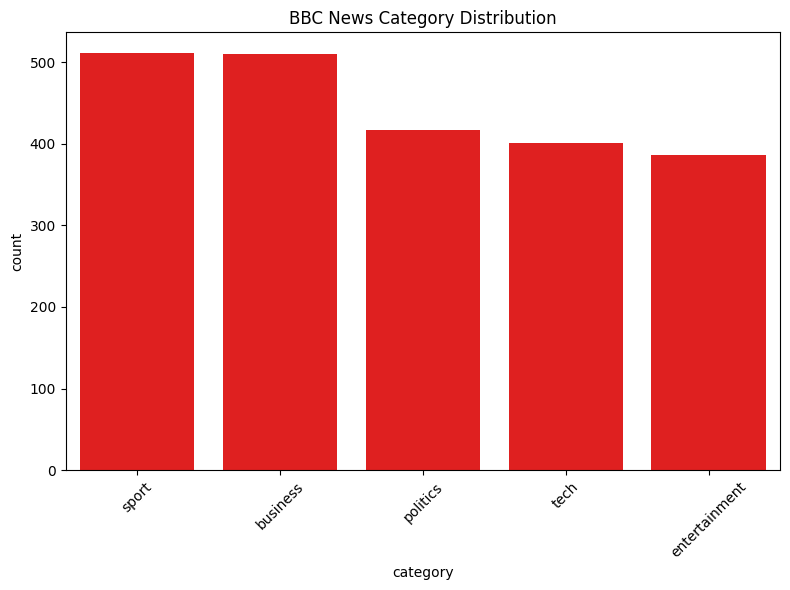

In [ ]:
# category distribution
plt.figure(figsize=(8,6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index,color="red")
plt.title("BBC News Category Distribution",c = "black")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
#vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['content'])
y = df['category']

In [ ]:
# split data into test (20 %) and train (80 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# training the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [50]:
#evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9707865168539326

Classification Report:
                precision    recall  f1-score   support

     business       0.96      0.96      0.96       115
entertainment       0.99      0.96      0.97        72
     politics       0.94      0.97      0.95        76
        sport       1.00      0.99      1.00       102
         tech       0.96      0.97      0.97        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



In [51]:
#saving the model & vectorizer
joblib.dump(model, "../models/model.pkl")
joblib.dump(vectorizer, "../models/vectorizer.pkl")

['../models/vectorizer.pkl']